In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
train = pd.read_csv("/run/media/thedossier/CaseFile102/Kaggle Worlds Competition/data/train.csv", index_col='image_id')
test = pd.read_csv("/run/media/thedossier/CaseFile102/Kaggle Worlds Competition/data/test.csv", index_col='image_id')

Summarizing the data sets

In [9]:
train.shape

(23734, 21)

In [10]:
test.shape

(12780, 20)

In [11]:
train.head()

,obs_day,obs_hour,obs_min,obs_sec,image_category,width,height,aspect_ratio,description1,description2,...,camera_model,iso,aperture_value,focal_length,exposure_time,latitude,longitude,country,city,avg_views/day
image_id,,,,,,,,,,,,,,,,,,,,,
ed821aabad928878a4b54d2ee3f698f5,Friday,1,32,52,Featured,3024,4032,0.75,A single bluebonnet on a light blue book.,blue and white floral wall decor,...,Pixel 3,85.0,1.8,4.4,1/40,31.968599,-99.901813,United States,NaN,1589.956098
fbef0735de5a2c1667c35cb46af89da6,Tuesday,10,30,21,Featured,5206,7809,0.67,NaN,green grass and green trees,...,NIKON Z 7,100.0,2.0,85.0,1/400,NaN,NaN,NaN,NaN,675.022971
510537f34a369eec9752e4fc3a5f8e9d,Sunday,11,3,40,Not Featured,5974,3983,1.50,Car show with objects in the background,NaN,...,NIKON D5500,2500.0,5.6,55.0,1/60,41.385064,2.173404,Espanha,Barcelona,1.603883
31b8acfa73101a2b24ae7cb8d5d5be5c,Friday,16,32,19,Featured,3382,2673,1.27,Red-eyed Tree Frog,green Frog,...,Canon EOS 5D Mark IV,1600.0,6.3,100.0,1/160,NaN,NaN,Costa Rica,NaN,2792.638863
46a303018f38d9f0ea7afddca5e09eaf,Monday,3,6,24,Featured,5340,3560,1.50,NaN,top view of white clouds during daytime,...,Canon EOS 5D Mark III,100.0,16.0,105.0,1/125,NaN,NaN,NaN,NaN,1057.189873


In [15]:
train.iloc[:, :-1].describe().T.sort_values(by='count', ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='red')\
                     .bar(subset=["mean",], color='green')

,count,mean,std,min,25%,50%,75%,max
obs_hour,23734.000000,12.600994,6.547164,0.000000,7.000000,13.000000,18.000000,23.000000
obs_min,23734.000000,29.598171,17.435887,0.000000,14.000000,30.000000,45.000000,59.000000
obs_sec,23734.000000,29.497935,17.244145,0.000000,15.000000,29.000000,44.000000,59.000000
width,23734.000000,4402.432502,1322.279580,1275.000000,3456.000000,4032.000000,5416.000000,18559.000000
height,23734.000000,4077.611191,1287.402035,774.000000,3200.000000,3948.500000,4928.000000,14162.000000
aspect_ratio,23734.000000,1.165886,0.419159,0.340000,0.670000,1.330000,1.500000,5.900000
focal_length,23734.000000,58.301827,83.035507,0.000000,18.000000,35.000000,56.000000,2032.000000
aperture_value,23722.000000,4.799294,3.810591,0.000000,2.200000,4.000000,5.600000,100.000000
iso,23639.000000,536.433309,1442.933238,0.000000,100.000000,160.000000,400.000000,65535.000000
latitude,8163.000000,33.271859,24.356592,-82.862752,28.488328,40.712784,48.060585,79.866667


In [16]:
train['avg_views/day'].describe()

count    2.373400e+04
mean     1.348299e+03
std      2.158557e+04
min      1.712329e-02
25%      1.182402e+01
50%      2.797738e+02
75%      8.019734e+02
max      1.779606e+06
Name: avg_views/day, dtype: float64

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23734 entries, ed821aabad928878a4b54d2ee3f698f5 to 35b8f30f868cf221c6f82775deadfd01
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   obs_day         23734 non-null  object 
 1   obs_hour        23734 non-null  int64  
 2   obs_min         23734 non-null  int64  
 3   obs_sec         23734 non-null  int64  
 4   image_category  23734 non-null  object 
 5   width           23734 non-null  int64  
 6   height          23734 non-null  int64  
 7   aspect_ratio    23734 non-null  float64
 8   description1    9787 non-null   object 
 9   description2    18131 non-null  object 
 10  camera_make     23663 non-null  object 
 11  camera_model    23650 non-null  object 
 12  iso             23639 non-null  float64
 13  aperture_value  23722 non-null  float64
 14  focal_length    23734 non-null  float64
 15  exposure_time   23651 non-null  object 
 16  latitude        8163 no

In [18]:
print("Number of missing values in the data ",sum(train.isna().sum()))

Number of missing values in the data  82111


In [20]:
num_features = list(set(train.select_dtypes(include=np.number).columns.tolist()) - set(['avg_views/day']))
num_features

['focal_length',
 'aperture_value',
 'width',
 'iso',
 'height',
 'obs_hour',
 'obs_sec',
 'aspect_ratio',
 'longitude',
 'obs_min',
 'latitude']

In [21]:
cat_features = train.select_dtypes(exclude=np.number).columns.tolist()
cat_features

['obs_day',
 'image_category',
 'description1',
 'description2',
 'camera_make',
 'camera_model',
 'exposure_time',
 'country',
 'city']

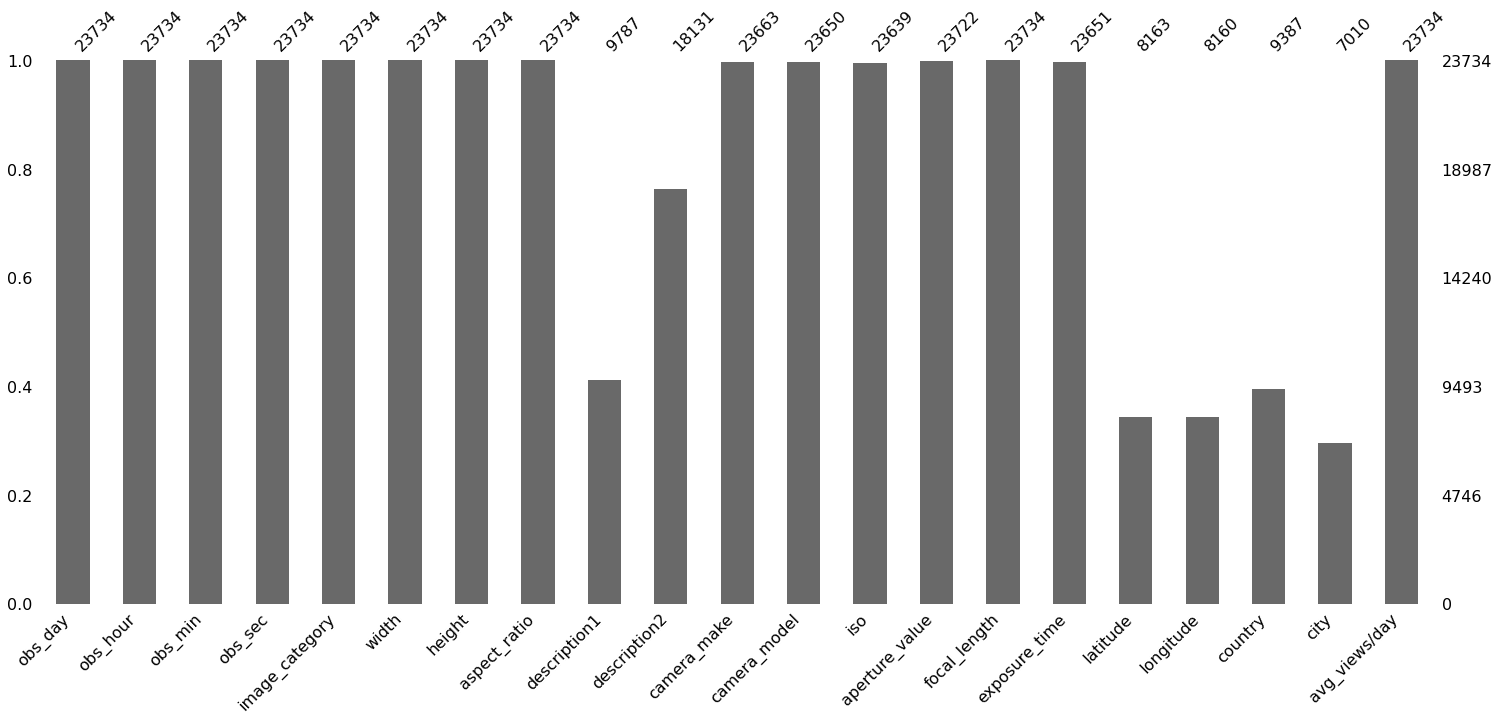

In [22]:
msno.bar(train);

In summary, the data has the following characteristics:

    Shape of the train data: 23734 rows and 21 columns.
    Variable types: 9 categorical and 12 numeric.
    Number of missing values in the data: 82111. 
    More specifically, the following features have missing values: description1, description 2, latitude, longitude, country, and city.
    Scale: the describe table above shows that the columns have different scales.

<AxesSubplot:>

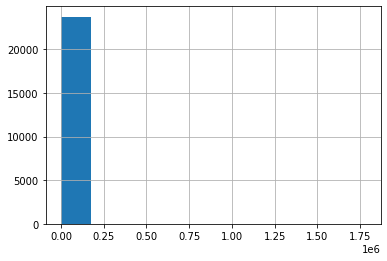

In [23]:
train['avg_views/day'].hist()

Correlation of the numeric variables

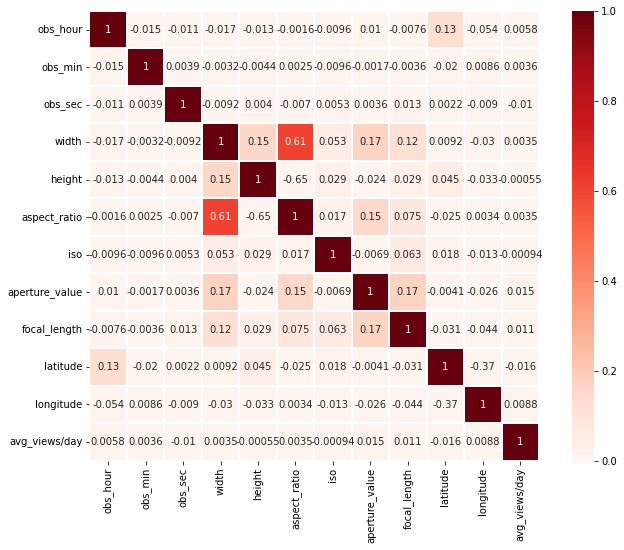

In [24]:
corr = train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.heatmap(corr, vmin=0, vmax=1, linewidths=2, square=True, cmap='Reds', annot=True);

Interesting notes: ratio and width show positive coorelation

In [25]:
from sklearn.model_selection import train_test_split

feature_cols = num_features
X = train[feature_cols]

y = train['avg_views/day']

# Separate data intro training and validation 
X_train, X_valid, y_train, y_valid = train_test_split(X, y)

In [26]:
from xgboost import XGBRFRegressor

xb = XGBRFRegressor()
xb.fit(X_train, y_train)

/home/thedossier/.local/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/thedossier/.local/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, enable_categorical=False, gamma=0, gpu_id=-1,
               importance_type=None, interaction_constraints='',
               max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=12,
               num_parallel_tree=100, objective='reg:squarederror',
               predictor='auto', random_state=0, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None)

In [27]:
from sklearn.metrics import mean_squared_error

predictions = xb.predict(X_valid)
rms = mean_squared_error(predictions, y_valid, squared=False)
print("RMSE: ", rms)

RMSE:  8055.843614097199


In [28]:
# Create submission
X_test = test.copy()

test_predictions = xb.predict(X_test[feature_cols])

/home/thedossier/.local/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [29]:
submission = pd.DataFrame({
    'image_id': X_test.index,
    'avg_views/day': test_predictions
})

In [ ]:
submission.to_csv('submission.csv', index=False)